In [1]:
#TRABALHO FINAL - COMBUSTÃO I - Grupo 1 - 2022.3

In [2]:
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.optimize as sp

In [3]:
#FUNÇÃO PHI (PHI_RICO E PHI_POBRE)
def phi(array, deltaT):
    xs = [x[0] for x in array]
    ys = [x[1] for x in array]

    degree = 15
    coefs, res, _, _, _ = np.polyfit(xs,ys,degree, full = True)
    ffit = np.poly1d(coefs)

    x = np.linspace(0,4,100000)
    f = ffit(x)

    def g(x):
      return deltaT + 0*x

    values = []
    phi_value = []

    for i in x:
      if(ffit(i) - deltaT > -0.1 and ffit(i) - deltaT < 0.1):
        values.append(i)

    phi_value.append(values[0])
    
    for k in range(0, len(values)-1):
      if (values[k+1] - values[k] > 0.1):
        phi_value.append(values[k+1])

    
    return phi_value

In [4]:
#FUNÇÃO DETERMINAÇÃO DO AREF

def Aref(m_comb, m3, P3, T3):
    deltaP3_P3 = 0.06 #Câmara de Combustão Anular
    deltaP3_qref = 20 #Câmara de Combustão Anular
    Dint = 0.05 #Arbitrado pelo projetista
    k = 143.5 #Esta constante varia apenas com relação às unidades usadas (SI = 143.5)

    phi_real = m_comb/m3
    phi_esteq = 0.06818 #razão estequiométrica de combustível/ar
    phi_global = phi_real/phi_esteq

    ZP = 0.25 #Porcentagem de ar que entrará na zona primária (valor considerado pelo professor foi de 25%) (tava 22%)
    phi_ZP = phi_global/ZP #Segundo Modak & Melconian (1985) phi_zp deverá ser menor ou igual a 1,5 para minimizar a formação de fuligem

    #Area de referencia Aerodinâmica
    Aref_aerodin = np.sqrt(k*(((m3*(np.sqrt(T3)))/(P3))**2)*(deltaP3_qref/deltaP3_P3))
    Dref_aerodin = (np.sqrt(((4*Aref_aerodin)/(np.pi))+(Dint**2))- Dint)/(2)

    #Cálculo do fator de correção
    if phi_ZP>=0.5 and phi_ZP<1.0:
      b = 245*(1.39 + np.log(phi_ZP))
    elif phi_ZP>=1.0 and phi_ZP<1.8:
      b = 170*(2 - np.log(phi_ZP))

    theta = 73*(10**6)

    Dref_ref = 0.2 #chute inicial

    Aref_quim = (theta*m3)/((P3**1.75)*(Dref_ref**0.75)*m.e**(T3/b))
    Dref_quim = (np.sqrt(((4*Aref_quim)/np.pi) + Dint**2) - Dint)/2

    Aref_ini = Aref_quim
    for _ in range(10000):
        Dref_new = (np.sqrt(((4*Aref_ini)/np.pi) + Dint**2) - Dint)/2
        Aref_new = (theta*m3)/((P3**1.75)*(Dref_new**0.75)*m.e**(T3/b))
        if abs(Aref_ini - Aref_new) < 0.0000001:
            break
        Aref_ini = Aref_new


    A_ref = Aref_new
    D_ref = (np.sqrt(((4*A_ref)/np.pi) + Dint**2) - Dint)/2
    #Valores arbitrados pelo Grupo
    D_ref = 0.15
    A_ref = (((D_ref*2)+Dint)**2)*np.pi/4

    A_ft = 0.56*A_ref 
    D_ft = A_ft/(np.pi*(Dint + D_ref))

    values = [A_ref, D_ref, phi_global, phi_ZP, A_ft, D_ft]

    return values

In [ ]:
#FUNÇÃO COMPRIMENTO DA CÂMARA

def compr_camara (D_ft):
    #Cálculo dos comprimentos das zonas na câmara de combustão (Conferir valores constantes presente nas equacoes dos comprimentos)
    L_ZR = 0.5*D_ft
    L_ZP = 0.75*D_ft
    L_ZS = 0.5*D_ft
    L_ZD = 1.5*D_ft

    L_CC = L_ZP + L_ZS + L_ZD #Comprimento total
    values = [L_CC, L_ZP, L_ZS, L_ZD]

    return values

In [ ]:
#FUNÇÃO NÚMERO DE INJETORES

def N_inj(D_ref):
    Dint = 0.05

    Dftinf = 0.1 #Diametro do liner informado pelo projetista
    Nij = np.pi*((Dint+D_ref)/(Dftinf))

    Nij_x = m.ceil(Nij)
    if Nij_x%2 == 1:
        Nij_x += 1

    return Nij_x

In [ ]:
#1 - PONTO DE PROJETO

P3_1 = 2*(10**6) #Pa
T3_1 = 814 #K
m3_1 = 18.1 #kg/s
T4_1 = 1600 #K
m_comb_1 = 0.427 #kg/s
deltaT_1 = 1600 - T3_1
array_1 = [(0.1, 255.7916152313428), (0.15918367346938775, 398.2854357202168), (0.21836734693877552, 535.2337660677717), (0.27755102040816326, 667.141688825943), (0.336734693877551, 794.3780476707591), (0.39591836734693875, 917.1845817774697), (0.45510204081632655, 1035.6739458129493), (0.5142857142857142, 1149.8133233582175), (0.573469387755102, 1259.3891170754068), (0.6326530612244897, 1363.9518711514766), (0.6918367346938775, 1462.7486762965868), (0.7510204081632652, 1554.6594703742126), (0.810204081632653, 1638.1514157381084), (0.8693877551020407, 1711.2264380270435), (0.9285714285714285, 1771.244268497319), (0.9877551020408162, 1814.44652712692), (1.046938775510204, 1835.58785148051), (1.1061224489795918, 1830.6949706755718), (1.1653061224489796, 1804.0101955068799), (1.2244897959183674, 1765.596203246118), (1.2836734693877552, 1722.5075621830288), (1.3428571428571427, 1677.9033727932242), (1.4020408163265305, 1633.076196625956), (1.4612244897959183, 1588.573713037471), (1.5204081632653061, 1544.6351604314345), (1.579591836734694, 1501.3614696673044), (1.6387755102040815, 1458.7876568176148), (1.6979591836734693, 1416.916517201014), (1.7571428571428571, 1375.7353185824259), (1.816326530612245, 1335.2243295519893), (1.8755102040816325, 1295.36118431236), (1.9346938775510203, 1256.1230575358318), (1.993877551020408, 1217.4876799914407), (2.0530612244897957, 1179.4337463183288), (2.1122448979591835, 1141.9410194564825), (2.1714285714285713, 1104.990298114538), (2.230612244897959, 1068.563345632551), (2.289795918367347, 1032.6428465184754), (2.3489795918367347, 997.2124557680331), (2.4081632653061225, 962.2570382152696), (2.4673469387755103, 927.7632848410788), (2.526530612244898, 893.7211065526014), (2.5857142857142854, 860.1267196556284), (2.644897959183673, 826.9896398221649), (2.704081632653061, 794.3493501346786), (2.763265306122449, 762.3179144380022), (2.8224489795918366, 731.19845566084), (2.8816326530612244, 701.8373893648729), (2.940816326530612, 676.5610515549843), (3.0, 659.6918186648259)]

phis = phi(array_1, deltaT_1)
phi_rico_1 = phis[0]
phi_pobre_1 = phis[1]

Aref_vec = Aref(m_comb_1, m3_1, P3_1, T3_1)
A_ref_1 = Aref_vec[0]
D_ref_1 = Aref_vec[1]
phi_global_1 = Aref_vec[2]
phi_ZP_1 = Aref_vec[3]
A_ft_1 = Aref_vec[4]
D_ft_1 = Aref_vec[5]

L_CC_1 = compr_camara(D_ft_1)[0]
L_ZP_1 = compr_camara(D_ft_1)[1]
L_ZS_1 = compr_camara(D_ft_1)[2]
L_ZD_1 = compr_camara(D_ft_1)[3]

Nij_1 = m.ceil(N_inj(D_ref_1))
if Nij_1%2 == 1:
  Nij_1 += 1


val_pp = [phi_rico_1, phi_pobre_1, A_ref_1, D_ref_1, L_CC_1, Nij_1, phi_ZP_1]
print(["phi_rico", "phi_pobre", "A_ref", "D_ref", "L_CC", "Nij", "phi_ZP"])
print(" Ponto de Projeto - Máximo Empuxo")
print(val_pp)

['phi_rico', 'phi_pobre', 'A_ref', 'D_ref', 'L_CC', 'Nij', 'phi_ZP']
 Ponto de Projeto - Máximo Empuxo
[0.33284332843328435, 2.7234672346723467, 0.0962112750161874, 0.15, 0.23581249999999998, 8, 1.384051641008769]


In [ ]:
#2 - MÁXIMA ALTITUDE

P3_2 = 0.7*(10**6) #Pa
T3_2 = 707 #K
m3_2 = 6.8 #kg/s
T4_2 = 1387 #K
m_comb_2 = 0.132 #kg/s
deltaT_2 = 1600 - T3_2
array_2 = [(0.1, 261.18717321317285), (0.15918367346938775, 405.7296928814658), (0.21836734693877552, 544.3922586554318), (0.27755102040816326, 677.7729782721831), (0.336734693877551, 806.3114525252131), (0.39591836734693875, 930.3060272944058), (0.45510204081632655, 1049.9102518087939), (0.5142857142857142, 1165.111057858408), (0.573469387755102, 1275.6817202251912), (0.6326530612244897, 1381.107518987094), (0.6918367346938775, 1480.498120145588), (0.7510204081632652, 1572.525402590918), (0.810204081632653, 1655.4361833252337), (0.8693877551020407, 1727.1353250189186), (0.9285714285714285, 1785.1947112593366), (0.9877551020408162, 1826.5595309670634), (1.046938775510204, 1847.1837652891404), (1.1061224489795918, 1843.7398438381988), (1.1653061224489796, 1819.0615156979961), (1.2244897959183674, 1781.9073645220556), (1.2836734693877552, 1739.4243602131942), (1.3428571428571427, 1695.0952111317283), (1.4020408163265305, 1650.3840208352894), (1.4612244897959183, 1605.9121689790545), (1.5204081632653061, 1561.9509600413585), (1.579591836734694, 1518.6166066155324), (1.6387755102040815, 1475.9524658761338), (1.6979591836734693, 1433.9666371741737), (1.7571428571428571, 1392.6502341046544), (1.816326530612245, 1351.986559297759), (1.8755102040816325, 1311.9557313661583), (1.9346938775510203, 1272.536965438165), (1.993877551020408, 1233.7096283997087), (2.0530612244897957, 1195.4536615055451), (2.1122448979591835, 1157.7496866361898), (2.1714285714285713, 1120.5789657037753), (2.230612244897959, 1083.9233047247224), (2.289795918367347, 1047.7649541705982), (2.3489795918367347, 1012.0865423916125), (2.4081632653061225, 976.8710849233762), (2.4673469387755103, 942.1021479128735), (2.526530612244898, 907.764338905054), (2.5857142857142854, 873.8445398797317), (2.644897959183673, 840.3349414075601), (2.704081632653061, 807.2408000712646), (2.763265306122449, 774.601858019289), (2.8224489795918366, 742.5587344949822), (2.8816326530612244, 711.5939867615318), (2.940816326530612, 683.5492234380774), (3.0, 664.4652805464318)]

phis = phi(array_2,deltaT_2)
phi_rico_2 = phis[0]
phi_pobre_2 = phis[1]

Aref_vec = Aref(m_comb_2, m3_2, P3_2, T3_2)
A_ref_2 = Aref_vec[0]
D_ref_2 = Aref_vec[1]
phi_global_2 = Aref_vec[2]
phi_ZP_2 = Aref_vec[3]
A_ft_2 = Aref_vec[4]
D_ft_2 = Aref_vec[5]

L_CC_2 = compr_camara(D_ft_2)[0]
L_ZP_2 = compr_camara(D_ft_2)[1]
L_ZS_2 = compr_camara(D_ft_2)[2]
L_ZD_2 = compr_camara(D_ft_2)[3]

Nij_2 = m.ceil(N_inj(D_ref_2))
if Nij_2%2 == 1:
  Nij_2 += 1

# val_pp = [phi_rico, phi_pobre, A_ref, D_ref, L_CC, Nij, phi_global, Z, K_k, phi_ZP]
val_pp = [phi_rico_2, phi_pobre_2, A_ref_2, D_ref_2, L_CC_2, Nij_2, phi_ZP_2]
print("Máxima Altitude")
print(val_pp)

Máxima Altitude
[0.37744377443774435, 2.5487454874548745, 0.0962112750161874, 0.15, 0.23581249999999998, 8, 1.1388538988490673]


In [ ]:
#3 - CRUZEIRO

P3_3 = 1.8*(10**6) #Pa
T3_3 = 1060 #K
m3_3 = 14.2 #kg/s
T4_3 = 1393 #K
m_comb_3 = 0.140 #kg/s
deltaT_3 = 1600 - T3_3
array_3 = [(0.1, 247.0436502767011), (0.15918367346938775, 385.7266504563331), (0.21836734693877552, 519.381894270203), (0.27755102040816326, 648.2979283022332), (0.336734693877551, 772.6157668652722), (0.39591836734693875, 892.3165170286579), (0.45510204081632655, 1007.195393827029), (0.5142857142857142, 1116.8260231271065), (0.573469387755102, 1220.5313091589114), (0.6326530612244897, 1317.3908527506242), (0.6918367346938775, 1406.3156574106451), (0.7510204081632652, 1486.1897120659464), (0.810204081632653, 1556.0184622589309), (0.8693877551020407, 1614.9852116059424), (0.9285714285714285, 1662.3505767892493), (0.9877551020408162, 1697.2260908029975), (1.046938775510204, 1718.3860817508512), (1.1061224489795918, 1724.500596591518), (1.1653061224489796, 1715.2655915371683), (1.2244897959183674, 1692.7966918298416), (1.2836734693877552, 1661.1576668724133), (1.3428571428571427, 1624.2705233455717), (1.4020408163265305, 1584.7700334462565), (1.4612244897959183, 1544.1455909506167), (1.5204081632653061, 1503.190528136624), (1.579591836734694, 1462.3234799763377), (1.6387755102040815, 1421.7658774911229), (1.6979591836734693, 1381.6341291480126), (1.7571428571428571, 1341.9876609112148), (1.816326530612245, 1302.854518090633), (1.8755102040816325, 1264.2453223954244), (1.9346938775510203, 1226.1610179465638), (1.993877551020408, 1188.5972107028683), (2.0530612244897957, 1151.5466052327588), (2.1122448979591835, 1115.0003675147427), (2.1714285714285713, 1078.948875131472), (2.230612244897959, 1043.3821187594585), (2.289795918367347, 1008.2899108718861), (2.3489795918367347, 973.6619939058053), (2.4081632653061225, 939.4880983919868), (2.4673469387755103, 905.7580009601961), (2.526530612244898, 872.4616213670661), (2.5857142857142854, 839.5892233434988), (2.644897959183673, 807.1318670265641), (2.704081632653061, 775.0824817094201), (2.763265306122449, 743.4386714515852), (2.8224489795918366, 712.2113060315587), (2.8816326530612244, 681.4586555846222), (2.940816326530612, 651.5077437903767), (3.0, 627.0214453223057)]

phis = phi(array_3,deltaT_3)
phi_rico_3 = phis[0]
phi_pobre_3 = phis[1]

Aref_vec = Aref(m_comb_3, m3_3, P3_3, T3_3)
A_ref_3 = Aref_vec[0]
D_ref_3 = Aref_vec[1]
phi_global_3 = Aref_vec[2]
phi_ZP_3 = Aref_vec[3]
A_ft_3 = Aref_vec[4]
D_ft_3 = Aref_vec[5]

L_CC_3 = compr_camara(D_ft_3)[0]
L_ZP_3 = compr_camara(D_ft_3)[1]
L_ZS_3 = compr_camara(D_ft_3)[2]
L_ZD_3 = compr_camara(D_ft_3)[3]


Nij_3 = m.ceil(N_inj(D_ref_3))
if Nij_3%2 == 1:
  Nij_3 += 1

val_pp = [phi_rico_3, phi_pobre_3, A_ref_3, D_ref_3, L_CC_3, Nij_3, phi_ZP_3]
print("Cruzeiro")
print(val_pp)

Cruzeiro
[0.22728227282272823, 3.084110841108411, 0.0962112750161874, 0.15, 0.23581249999999998, 8, 0.5784191803800214]


In [ ]:
#4 - IDLE

P3_4 = 0.15*(10**6) #Pa
T3_4 = 343 #K
m3_4 = 1.05 #kg/s
T4_4 = 703 #K
m_comb_4 = 0.0091 #kg/s
deltaT_4 = 1600 - T3_4
array_4 = [(0.1, 281.611486370987), (0.15918367346938775, 437.1731243940127), (0.21836734693877552, 584.408973562011), (0.27755102040816326, 724.5287059481827), (0.336734693877551, 858.8576199075524), (0.39591836734693875, 988.0322106328101), (0.45510204081632655, 1112.491405495097), (0.5142857142857142, 1232.5257648976453), (0.573469387755102, 1348.2612377801863), (0.6326530612244897, 1459.6066970930203), (0.6918367346938775, 1566.142707353199), (0.7510204081632652, 1666.9331348233272), (0.810204081632653, 1760.271176686531), (0.8693877551020407, 1843.4167301973625), (0.9285714285714285, 1912.3145168471665), (0.9877551020408162, 1960.874652808368), (1.046938775510204, 1979.9133073180606), (1.1061224489795918, 1964.2238684896797), (1.1653061224489796, 1926.504345887944), (1.2244897959183674, 1881.2813581007813), (1.2836734693877552, 1834.2556853675278), (1.3428571428571427, 1787.1773182473703), (1.4020408163265305, 1740.627468501144), (1.4612244897959183, 1694.8119090281225), (1.5204081632653061, 1649.7956456283682), (1.579591836734694, 1605.585050686881), (1.6387755102040815, 1562.1613314031122), (1.6979591836734693, 1519.4955170600806), (1.7571428571428571, 1477.5553938737428), (1.816326530612245, 1436.3086316315243), (1.8755102040816325, 1395.7240516735271), (1.9346938775510203, 1355.771994607764), (1.993877551020408, 1316.4242704384064), (2.0530612244897957, 1277.6539329899995), (2.1122448979591835, 1239.4349955559462), (2.1714285714285713, 1201.7421428651276), (2.230612244897959, 1164.550467999315), (2.289795918367347, 1127.8352628815376), (2.3489795918367347, 1091.5719232088366), (2.4081632653061225, 1055.736126082147), (2.4673469387755103, 1020.3047038687268), (2.526530612244898, 985.2583727873548), (2.5857142857142854, 950.5896083911387), (2.644897959183673, 916.3254307563204), (2.704081632653061, 882.59488041846), (2.763265306122449, 849.8278016857957), (2.8224489795918366, 819.254380604501), (2.8816326530612244, 793.4392742633488), (2.940816326530612, 774.8270695108895), (3.0, 763.0486157796561)]

phis = phi(array_4,deltaT_4)
phi_rico_4 = phis[0]
phi_pobre_4 = phis[1]

Aref_vec = Aref(m_comb_4, m3_4, P3_4, T3_4)
A_ref_4 = Aref_vec[0]
D_ref_4 = Aref_vec[1]
phi_global_4 = Aref_vec[2]
phi_ZP_4 = Aref_vec[3]
A_ft_4 = Aref_vec[4]
D_ft_4 = Aref_vec[5]

L_CC_4 = compr_camara(D_ft_4)[0]
L_ZP_4 = compr_camara(D_ft_4)[1]
L_ZS_4 = compr_camara(D_ft_4)[2]
L_ZD_4 = compr_camara(D_ft_4)[3]


Nij_4 = m.ceil(N_inj(D_ref_4))
if Nij_4%2 == 1:
  Nij_4 += 1

val_pp = [phi_rico_4, phi_pobre_4, A_ref_4, D_ref_4, L_CC_4, Nij_4, phi_ZP_4]
print("Idle")
print(val_pp)

Idle
[0.5274052740527405, 2.080180801808018, 0.0962112750161874, 0.15, 0.23581249999999998, 8, 0.5084580033245331]


In [ ]:
#DIFUSOR

R_ar = 287 # J/kg.K
Dint = 0.05
m_3 = np.array([m3_1, m3_2, m3_3, m3_4])
A_refs = np.array([A_ref_1, A_ref_2, A_ref_3, A_ref_4])
D_refs = np.array([D_ref_1, D_ref_2, D_ref_3, D_ref_4])
D_fts = np.array([D_ft_1, D_ft_2, D_ft_3, D_ft_4])
Ps = np.array([P3_1, P3_2, P3_3, P3_4])
Ts = np.array([T3_1, T3_2, T3_3, T3_4])
A_fts = 0.7*A_refs
A_3 = 0.096 # Área A3 no caso de câmara anular A3 = A_compr
V_3 = 150 #m/s

A_an = A_refs - A_fts #Área Anular
m_an = (V_3*A_an*Ps)/(Ts*R_ar) # Vazão de massa em A_an
A_0 = (m_3/m_an)*A_an # Área A_0 considerando m3 da condição de projeto escolhida

D0 = np.sqrt(A_0*4/np.pi)
D3 = np.sqrt(A_3*4/np.pi)
psi = 11*(np.pi/180) #MODIFICAR O ANGULO!!!

Ldif = abs((D0 - D3))/(2*np.tan(psi))
print(Ldif)

A = (m_3*(Ts**0.5))/Ps
B = (np.tan(np.radians(psi))**1.22)/(A_3**2)
C = (1 - (A_3/A_0))**2
delta_P_diff = 502.4*Ps*A*B*C

Nijs = np.array([Nij_1, Nij_2, Nij_3, Nij_4])
Cds = 1
m_ZP = 0.25*m_3
A_s = (0.5*(m_ZP/m_3)*(1/Cds))* A_0
D_s = np.sqrt(4*A_s/(np.pi*Nijs))
L_s = (D_refs - D0)/(2*np.tan(psi))
theta = np.arctan((D_fts - D_s)/(2*L_s))


[0.55471637 0.56658457 0.53217022 0.7025808 ]


In [ ]:
#TURBILHONADOR

As_compr = 0.096 #Area de saida do compressor
Dint = 0.05

alpha_SW = 55*(np.pi/180) #definir ainda, deve ser entre 45° e 70° o ângulo das pás
beta_SW = 55*(np.pi/180) #definir ainda, deve ser entre 45° e 70° ângulo de mudança de direção do escoamento de ar

D_SW = 0.30 * D_fts  #diâmetro do turbilhonador
#A_SW_2 = np.pi*(D_SW/2)**2
L_ZR = 2 * D_SW       #comprimento da zona de recirculação
m_SW = (1/3) * m_ZP  #quantidade de ar do turbilhonador

K_SW = 1.30 #KSW = 1,30 e KSW = 1,15 para pás finas retas e para pás finas curvadas, respectivamente

deltaPs_qref = 0.25 * (A_refs/A_0)**2
deltaPsw_qref = 0.2 - deltaPs_qref

pt1 = deltaPsw_qref * (1/(K_SW *(m_SW/m_3)**2 * (1/np.cos(beta_SW))**2))
pt2 = (A_refs / A_fts)**2 / (1/ np.cos(beta_SW))**2
A_SW = A_refs / (abs(pt1 + pt2))**0.5 #Área da coroa do turbilhonador
A_SW_corr = 1.5*A_SW #área ASW é 50 % maior do que o valor calculado pela equação
A_SW_2 = 1.5*(1/np.cos(beta_SW))/(Nijs*(abs(deltaPsw_qref*(1/(K_SW*(m_SW/m_3)*A_refs**2))))**0.5 + (1/A_fts)**2)
print(A_SW_corr) #aqui está sendo calculado o valor da A_SW para todos os valores de beta_SW, ainda precisa definir um valor fixo para beta_SW 
print(A_SW_2)    #valor de A_SW com a fórmula do TCC
#deltaP_S = qs*0.25
#D_at = 2 * R_at       #tem que ser de 10 a 15% do D_ref
#S_s = G_phi / ((R_3 - R_H)*G_x)  #número de “swirl" e Ss' do escoamento secundário
#S = S_s / (1 + M_R)              #número de “swirl" S'

Dinj = np.sqrt(abs(D_SW**2 - (4*A_SW/(np.pi*Nijs)))) #Diâmetro dos injetores


#Angulo teta da cupula
teta_cup = np.arcsin((-(D_fts**2 - D_SW * D_fts) - (D_fts - 4*L_ZR)*np.sqrt(D_fts**2 - 4*D_fts * D_SW + 4* D_SW**2 - 8*D_fts * L_ZR + 16*L_ZR**2))/(2*D_fts - 4*D_fts*D_SW + 4*D_SW**2 - 8*D_fts * L_ZR + 16*L_ZR**2))
print(teta_cup)  #teta_cup é angulo Θ da cupula

L_cup = (D_fts - D_SW)/ 2 * np.tan(teta_cup) 
print(L_cup)    #L_cup é o comprimento da cúpula



[0.00707122 0.0065843  0.00804904 0.00228526]
[0.00243215 0.0022973  0.00269164 0.00091328]
[0.03334663 0.03334663 0.03334663 0.03334663]
[0.00100119 0.00100119 0.00100119 0.00100119]


[0.87072461 0.87072461 0.87072461 0.87072461]


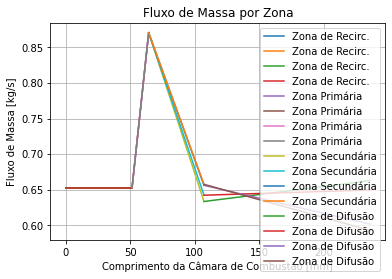

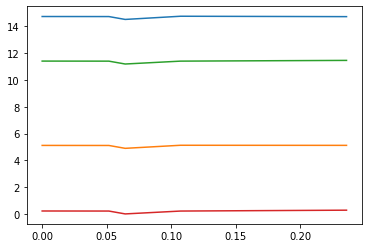

In [ ]:
#ARREFECIMENTO POR FILME DE RESFRIAMENTO

Ts = np.array([T3_1, T3_2, T3_3, T3_4])
Ts_4 = np.array([T4_1, T4_2, T4_3, T4_4])
phi_ZP = 1.249
phi_ZS = 0.8
phi_ZD = 0.237
phi_global = np.array([phi_global_1, phi_global_2, phi_global_3, phi_global_4])


#COMPRIMENTO DE ZONAS
L_CCs = np.array([L_CC_1, L_CC_2, L_CC_3, L_CC_4])
L_ZPs = np.array([L_ZP_1, L_ZP_2, L_ZP_3, L_ZP_4])
L_ZSs = np.array([L_ZS_1, L_ZS_2, L_ZS_3, L_ZS_4])
L_ZDs = np.array([L_ZD_1, L_ZD_2, L_ZD_3, L_ZD_4])


#CÁLCULO DO FLUXO DE MASSA NA ZONA PRIMÁRIA
#m_ZP

#CÁLCULO DO FLUXO DE MASSA NA ZONA SECUNDÁRIA
m_ZS = (phi_global/phi_ZS)*m_3

#CÁLCULO DA PORCENTAGEM DE AR DESTINADA AO ARREFECIMENTO
m_arref = m_3*((0.1*Ts)-30)

#CÁLCULO DA VAZÃO DE AR NA ZONA DE DILUIÇÃO
m_ZD = m_3*(1 - ((m_ZP + m_ZS)/m_3)) 

#BALANÇO DE MASSA
bal_massa = m_3 - (m_ZS + m_ZP + m_ZD)

T_alvo = 1100 #TEMPERATURA ACEITÁVEL PARA EVITAR O STRESS TÉRMICO PARA LIGAS METÁLICAS

deltaT_combustao = Ts_4 - Ts 
T_g = Ts + deltaT_combustao
A_an = 2*np.pi*(D_refs - D_fts)*L_CCs
mu_ar = (0.03863 + 0.00749*Ts - 5.8564*(10**-6)*(Ts**2) + 2.7769*(10**-9)*(Ts**3) - 4.600774*(10**-13)*(Ts**4))*(10**-5)
mu_g = (0.03863 + 0.00749*T_g - 5.8564*(10**-6)*(T_g**2) + 2.7769*(10**-9)*(T_g**3) - 4.600774*(10**-13)*(T_g**4))*(10**-5)


#CÁLCULO DA FENDA DA ZONA PRIMÁRIA
t_ZP = 1*10**-3 #Espessura de fenda
t_w_ZP = 1*10**-2 #Espessura do tubo de chama
s_ZP = 0.4*10**-3 #Altura da fenda
n_fendas_ZP = 35 #DEFINIR NUMERO DE FENDAS

A_total_fendas_ZP = n_fendas_ZP*2*np.pi*s_ZP*(D_refs - D_fts)
m_an_ZP = m_3
m_g_ZP = m_3 - (3/4)*m_ZP 
rho_g_u_g_ZP = m_g_ZP/A_fts

m_fenda_ZP = m_an_ZP*(A_total_fendas_ZP/A_an)
rho_an_u_an_ZP = m_fenda_ZP/A_total_fendas_ZP
m_ZP_2 = (rho_an_u_an_ZP)/(rho_g_u_g_ZP)

#CÁLCULO DA FENDA DA ZONA SECUNDÁRIA
t_ZS = 1*10**-3
s_ZS = 1*10**-3
t_w_ZS = 10*10**-3
n_fendas_ZS = 20

A_total_fendas_ZS = n_fendas_ZS*2*np.pi*s_ZS*(D_refs - D_fts)
m_an_ZS = m_3 - m_ZS - m_fenda_ZP
m_g_ZS = m_3 - m_ZS
rho_g_u_g_ZS = m_g_ZS/A_fts
m_dot_fenda_ZS = m_an_ZS*(A_total_fendas_ZS/A_an)
rho_an_u_an_ZS = m_dot_fenda_ZS/A_total_fendas_ZS
m_ZS = (rho_an_u_an_ZS)/(rho_g_u_g_ZS)

#CÁLCULO DA FENDA DA ZONA DE DILUIÇÃO
t_ZD = 1*10**-3
s_ZD = 3*10**-3
t_w_ZD = 10*10**-3
n_fendas_ZD = 6

A_total_fendas_ZD = n_fendas_ZD*2*np.pi*s_ZD*(D_refs - D_fts)
m_an_ZD = m_3 -m_ZD - m_dot_fenda_ZS
m_g_ZD = m_3 - m_ZD
rho_g_u_g_ZD = m_g_ZD/A_fts
m_fenda_ZD = m_an_ZD*(A_total_fendas_ZD/A_an)
rho_an_u_an_ZD = m_fenda_ZD/A_total_fendas_ZD
m_ZD = (rho_an_u_an_ZD)/(rho_g_u_g_ZD)

x = np.arange(0.1, L_CCs.all(), 0.001)
a = range(len(x))
n_r = []
for i in range(len(x)):
  if x[i] < L_ZPs.all():
    if 0.5 < m_ZP.all() <= 1.3:
      g_1 = 1.1*(m_ZP**0.65)*((mu_ar/mu_g)**0.15)*((x[i]/s_ZP)**-0.2)*((t_ZP/s_ZP)**-0.2)
      n_r.append(g_1)
    elif 1.3 < m_ZP.all() < 4:
      g_2 = 1.28*((mu_ar/mu_g)**0.15)*((x[i]/s_ZP)**-0.2)*((t_ZP/s_ZP)**-0.2)
      n_r.append(g_2)
  elif x[i] >= L_ZPs.all() and x[i] < (L_ZSs + L_ZPs):
    if 0.5 < m_ZS <= 1.3:
      g_3 = 1.1*(m_ZS**0.65)*((mu_ar/mu_g)**0.15)*((x[i]/s_ZS)**-0.2)*((t_ZS/s_ZS)**-0.2)
      n_r.append(g_3)
    elif 1.3 < m_ZS.all() < 4:
      g_4 = 1.28*((mu_ar/mu_g)**0.15)*((x[i]/s_ZS)**-0.2)*((t_ZS/s_ZS)**-0.2)
      n_r.append(g_4)
  elif x[i] >= (L_ZSs + L_ZPs) and x[i] <= L_CCs:
    if 0.5 < m_ZD.all() <= 1.3:
      g_5 = 1.1*(m_ZD**0.65)*((mu_ar/mu_g)**0.15)*((x[i]/s_ZD)**-0.2)*((t_ZD/s_ZD)**-0.2)
      n_r.append(g_5)
    elif 1.3 < m_ZD.all() < 4:
      g_6 = 1.28*((mu_ar/mu_g)**0.15)*((x[i]/s_ZD)**-0.2)*((t_ZD/s_ZD)**-0.2)
      n_r.append(g_6)

T_g_w = []
h = range(len(n_r))
for i in h:
  temp = T_g - n_r[i]*(T_g - T3_1)
  T_g_w.append(temp)

i = 0
tgw_len = range(len(T_g_w))
for i in tgw_len:
  if T_g_w[i].all() > T_alvo:
    print(f'Posição da Fenda Necessária para o Arrefecimento = {x[i]}')
    i = i + 1
result_1 = []

#FLUXO DE MASSA EM CADA ZONA 
comp_m_1 = np.linspace(0, L_ZR)
comp_m_2 = np.linspace(L_ZR, L_ZPs)
comp_m_3 = np.linspace(L_ZPs, (L_ZPs + L_ZSs))
comp_m_4 = np.linspace((L_ZPs+L_ZSs), L_CCs)

print(m_ZP)
m_g_ZR = (3/4)*m_ZP
m_g_ZP = 1
m_g_ZS = 1

def vazao_ZR(x):
  return m_g_ZR
  
def vazao_ZP(x):
  global m_g_ZP
  m_g_ZP = m_g_ZR + ((m_ZP - m_g_ZR)*(x - L_ZR))/(L_ZPs - L_ZR)
  return m_g_ZP

def vazao_ZS(x):
  global m_g_ZS
  m_g_ZS =  m_g_ZP + ((m_ZS - m_g_ZP)*(x - L_ZPs))/(L_ZSs)
  return m_g_ZS

def vazao_ZD(x):
  m_g_ZD = m_g_ZS + ((m_ZD - m_g_ZS)*(x - (L_ZPs + L_ZSs)))/(L_ZDs)
  return m_g_ZD

mass_1 = []
mass_2 = []
mass_3 = []
mass_4 = []

for i in comp_m_1:
  mass_1.append(vazao_ZR(i)) 

for i in comp_m_2:
  mass_2.append(vazao_ZP(i)) 

for i in comp_m_3:
  mass_3.append(vazao_ZS(i)) 

for i in comp_m_4:
  mass_4.append(vazao_ZD(i)) 

plt.plot(comp_m_1*1000, mass_1, label = 'Zona de Recirc.')
plt.plot(comp_m_2*1000, mass_2, label = 'Zona Primária')
plt.plot(comp_m_3*1000, mass_3, label = 'Zona Secundária')
plt.plot(comp_m_4*1000, mass_4, label = 'Zona de Difusão')
plt.grid(True, which='both')
plt.ylabel('Fluxo de Massa [kg/s]')
plt.xlabel('Comprimento da Câmara de Combustão [mm]')
plt.title('Fluxo de Massa por Zona')
plt.legend()
plt.show()

m_total = mass_1 + mass_2 + mass_3 + mass_4
comp_total = []
comp_total.extend(comp_m_1)
comp_total.extend(comp_m_2)
comp_total.extend(comp_m_3)
comp_total.extend(comp_m_4)


#BALANÇO DE MASSA
for i in range(len(m_total)):
  A =  m_3 - m_total[i] - m_fenda_ZP - m_dot_fenda_ZS - m_fenda_ZD
  result_1.append(A)


plt.plot(comp_total, result_1)
plt.show()